In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("deliveries.csv")

In [3]:
df["sort_name"]=df["batting_team"].map({'Kolkata Knight Riders':"KKR","Royal Challengers Bangalore":'RCB',
                                              'Chennai Super Kings':"CSK","Kings XI Punjab":'KXIP',"Rajasthan Royals":'RR',
                                              "Delhi Daredevils":"DD","Mumbai Indians":"MI","Deccan Chargers":"DC",
                                              "Kochi Tuskers Kerala":"KTK","Pune Warriors":'PWP',"Sunrisers Hyderabad":'SRH',
                                              "Rising Pune Supergiants":"RPS","Gujarat Lions":"GL"})

In [4]:
df

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,sort_name
0,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SC Ganguly,BB McCullum,P Kumar,False,...,1,0,0,0,1,1,NaN,NaN,NaN,KKR
1,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,SC Ganguly,P Kumar,False,...,0,0,0,0,0,0,NaN,NaN,NaN,KKR
2,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,BB McCullum,SC Ganguly,P Kumar,False,...,0,0,0,0,1,1,NaN,NaN,NaN,KKR
3,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,4,BB McCullum,SC Ganguly,P Kumar,False,...,0,0,0,0,0,0,NaN,NaN,NaN,KKR
4,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,5,BB McCullum,SC Ganguly,P Kumar,False,...,0,0,0,0,0,0,NaN,NaN,NaN,KKR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136593,577,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,CJ Jordan,B Kumar,False,...,0,0,0,2,0,2,NaN,NaN,NaN,RCB
136594,577,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,CJ Jordan,B Kumar,False,...,0,0,0,0,0,0,CJ Jordan,run out,NV Ojha,RCB
136595,577,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,Sachin Baby,B Kumar,False,...,1,0,0,0,1,1,NaN,NaN,NaN,RCB
136596,577,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,Iqbal Abdulla,B Kumar,False,...,0,0,0,1,0,1,NaN,NaN,NaN,RCB


In [5]:
df["match_id"]=df["match_id"].astype(object)

In [6]:
df["over"]=df["over"].astype(object)

In [7]:
df["ball"]=df["ball"].astype(object)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136598 entries, 0 to 136597
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          136598 non-null  object
 1   inning            136598 non-null  int64 
 2   batting_team      136598 non-null  object
 3   bowling_team      136598 non-null  object
 4   over              136598 non-null  object
 5   ball              136598 non-null  object
 6   batsman           136598 non-null  object
 7   non_striker       136598 non-null  object
 8   bowler            136598 non-null  object
 9   is_super_over     136598 non-null  bool  
 10  wide_runs         136598 non-null  int64 
 11  bye_runs          136598 non-null  int64 
 12  legbye_runs       136598 non-null  int64 
 13  noball_runs       136598 non-null  int64 
 14  penalty_runs      136598 non-null  int64 
 15  batsman_runs      136598 non-null  int64 
 16  extra_runs        136598 non-null  int

In [9]:
df.describe()

,inning,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,136598.000000,136598.000000,136598.000000,136598.000000,136598.000000,136598.000000,136598.000000,136598.000000,136598.000000
mean,1.482738,0.037782,0.004978,0.022372,0.004480,0.000073,1.215311,0.069686,1.284997
std,0.501575,0.260535,0.115512,0.201309,0.074062,0.019132,1.589654,0.353357,1.579014
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,4.000000,5.000000,4.000000,5.000000,5.000000,5.000000,6.000000,7.000000,7.000000


In [9]:
team = pd.Series(df["batting_team"].unique(),name="Team Name")
print(team)

0           Kolkata Knight Riders
1     Royal Challengers Bangalore
2             Chennai Super Kings
3                 Kings XI Punjab
4                Rajasthan Royals
5                Delhi Daredevils
6                  Mumbai Indians
7                 Deccan Chargers
8            Kochi Tuskers Kerala
9                   Pune Warriors
10            Sunrisers Hyderabad
11        Rising Pune Supergiants
12                  Gujarat Lions
Name: Team Name, dtype: object


In [10]:
df.nunique()

match_id            577
inning                4
batting_team         13
bowling_team         13
over                 20
ball                  9
batsman             436
non_striker         431
bowler              334
is_super_over         2
wide_runs             6
bye_runs              5
legbye_runs           6
noball_runs           5
penalty_runs          2
batsman_runs          7
extra_runs            7
total_runs            8
player_dismissed    412
dismissal_kind        9
fielder             421
sort_name            13
dtype: int64

# Total Runs of Individual Teams

In [11]:
total_runs = df.groupby("batting_team")["total_runs"].sum()

batting_team
Chennai Super Kings            20899
Deccan Chargers                11463
Delhi Daredevils               19734
Gujarat Lions                   2450
Kings XI Punjab                20861
Kochi Tuskers Kerala            1901
Kolkata Knight Riders          19481
Mumbai Indians                 21721
Pune Warriors                   6358
Rajasthan Royals               17703
Rising Pune Supergiants         2063
Royal Challengers Bangalore    21591
Sunrisers Hyderabad             9303
Name: total_runs, dtype: int64 



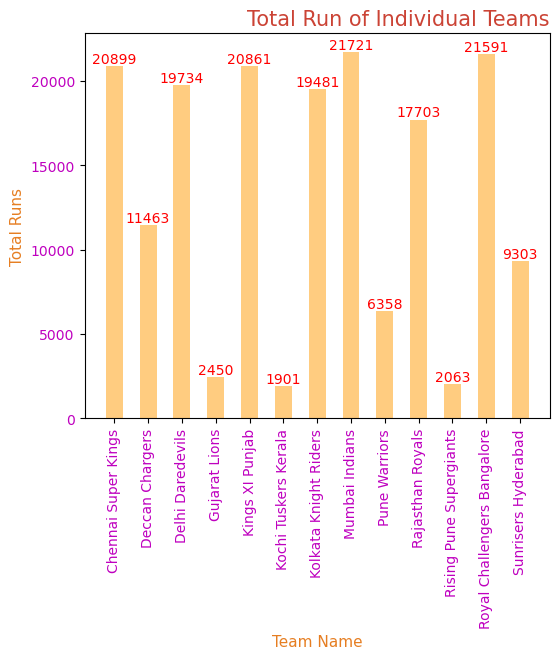

In [121]:
print(total_runs,"\n")
plt.figure(figsize=(6,5))
plt.style.use('fast')
plt.bar_label(plt.bar(total_runs.index,total_runs.values,width=0.5,color="#FFCC80"),color="r")
plt.title("Total Run of Individual Teams",color="#CB4335",loc="right",size=15)
plt.xlabel("Team Name",color="#E67E22",size=11)
plt.ylabel("Total Runs",color="#E67E22",size=11)
plt.xticks(rotation=90,color="m")
plt.yticks(color="m")
plt.show()

# Total Number Fours Per Match

In [30]:
four_runs = df[df["total_runs"]==4]

In [125]:
count_of_fours=four_runs.groupby("match_id")["total_runs"].count()

match_id
1      19
2      37
3      32
4      33
5      13
       ..
573    22
574    24
575    23
576    35
577    31
Name: total_runs, Length: 577, dtype: int64


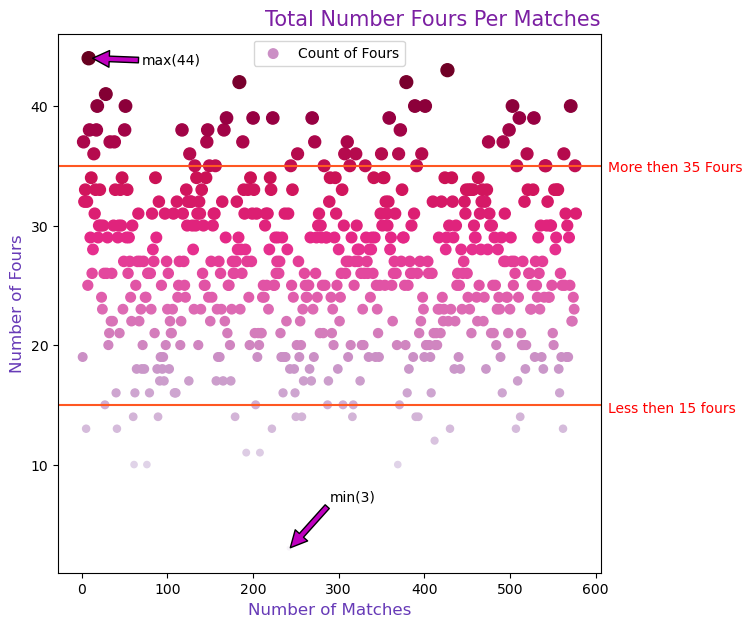

In [186]:
print(count_of_fours)
plt.style.use("default")
plt.figure(figsize=(7,7))
plt.scatter(count_of_fours.index,count_of_fours.values,s=count_of_fours.values*2,
            c=count_of_fours.values*2,cmap="PuRd",label="Count of Fours")
plt.title("Total Number Fours Per Matches",color="#7B1FA2",loc="right",size=15)
plt.xlabel("Number of Matches", color="#673AB7",size=12)
plt.ylabel("Number of Fours", color="#673AB7",size=12)
plt.axhline(35,color="#FF5722")
plt.text(615,34.5,"More then 35 Fours",color='red')

plt.axhline(15,color="#FF5722")
plt.text(615,14.4,"Less then 15 fours",color='red')
plt.legend(loc="upper center")
plt.annotate('min(3)', xy=(243,3), xytext=(290,7),arrowprops=dict(facecolor='m', shrink=0.01))
plt.annotate('max(44)', xy=(12,44), xytext=(70,43.5),arrowprops=dict(facecolor='m', shrink=0.01))

plt.show()

# Total Number Sixes Per Match

In [101]:
sixes = df[df["total_runs"]==6]

In [139]:
total_sixes = sixes.groupby("match_id")["total_runs"].count()

match_id
1      17
2      25
3       4
4      11
5      10
       ..
573     5
574    15
575    10
576    10
577    23
Name: total_runs, Length: 577, dtype: int64


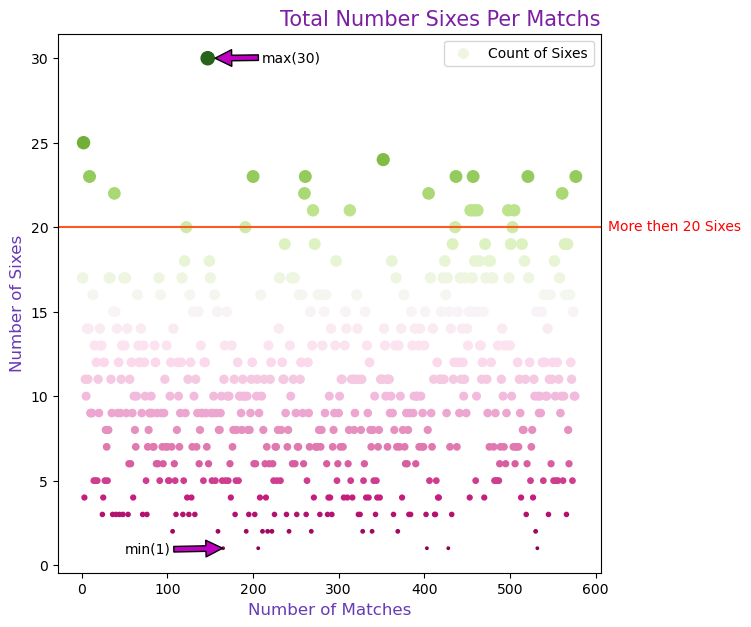

In [206]:
print(total_sixes)
plt.style.use("default")
plt.figure(figsize=(7,7))
plt.scatter(total_sixes.index,total_sixes.values,s=total_sixes.values*3,c=total_sixes.values*3,cmap="PiYG",label="Count of Sixes")
plt.title("Total Number Sixes Per Matchs",color="#7B1FA2",loc="right",size=15)
plt.xlabel("Number of Matches", color="#673AB7",size=12)
plt.ylabel("Number of Sixes", color="#673AB7",size=12)
plt.axhline(20,color="#FF5722")
plt.text(615,19.8,"More then 20 Sixes",color='red')

plt.annotate('min(1)', xy=(165,1), xytext=(50,0.7),arrowprops=dict(facecolor='m', shrink=0.01))
plt.annotate('max(30)', xy=(155,30), xytext=(210,29.8),arrowprops=dict(facecolor='m', shrink=0.01))

plt.legend()
plt.show()

# Total Number Of Fours OF Each Balls

In [33]:
four_runs=four_runs[four_runs["ball"].isin([1,2,3,4,5,6])]
number_of_fours = four_runs.pivot_table(index="over",columns="ball",values="total_runs",aggfunc="count")

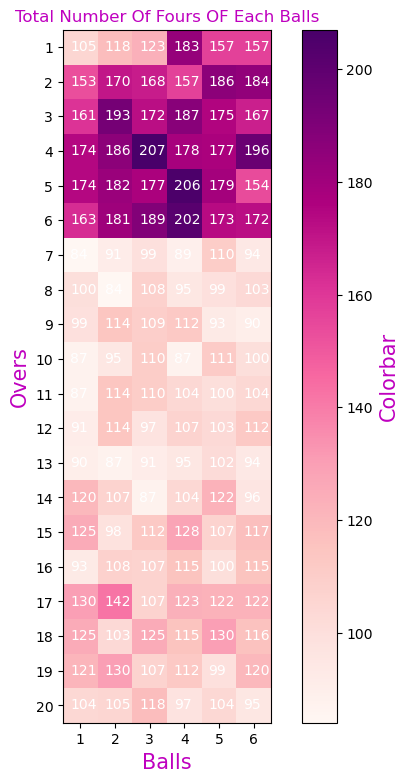

In [95]:
plt.figure(figsize=(8,9))
plt.imshow(number_of_fours,cmap="RdPu")
k=plt.colorbar()
plt.xticks(np.arange(0,6),number_of_fours.columns)
plt.yticks(np.arange(0,20),number_of_fours.index)
plt.xlabel("Balls", color="m",size=15)
plt.ylabel("Overs", color="m",size=15)
plt.title("Total Number Of Fours OF Each Balls",color="m")
k.set_label("Colorbar", color="m",size=15)
for l in number_of_fours.index:
    for j in number_of_fours.columns:
        plt.annotate(number_of_fours.loc[l][j],(j-1.3,l-0.9),color="white") 

plt.show()

# Total Number Of Sixes Of Each Balls

In [19]:
six_runs=df[df["total_runs"]==6]
six_runs=six_runs[six_runs["ball"].isin([1,2,3,4,5,6])]

In [20]:
number_of_sixes = six_runs.pivot_table(index="over",columns="ball",values="total_runs",aggfunc="count")

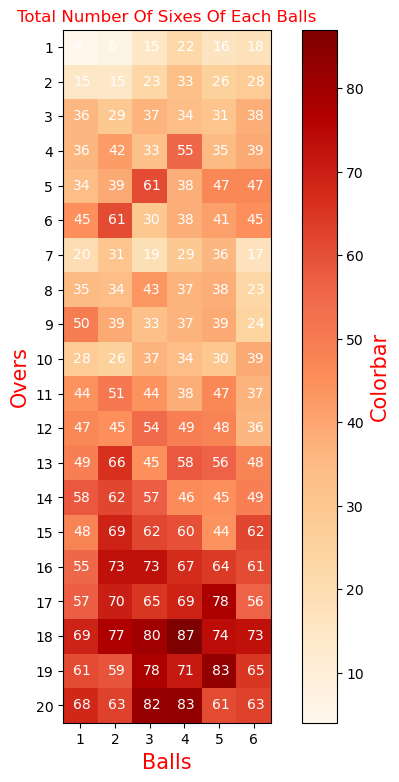

In [99]:
plt.figure(figsize=(8,9))
plt.imshow(number_of_sixes,cmap="OrRd")
k=plt.colorbar()
plt.xticks(np.arange(0,6),number_of_sixes.columns)
plt.yticks(np.arange(0,20),number_of_sixes.index)
plt.xlabel("Balls", color="r",size=15)
plt.ylabel("Overs", color="r",size=15)
plt.title("Total Number Of Sixes Of Each Balls",color="r")
k.set_label("Colorbar", color="r",size=15)
for k in number_of_sixes.index:
    for j in number_of_sixes.columns:
        plt.annotate(number_of_sixes.loc[k][j],(j-1.2,k-0.9),color="white") 


plt.show()

# Total Runs Per Each Balls

In [277]:
runs = df[df["ball"].isin([1,2,3,4,5,6])]

In [278]:
runs_per_ball=runs.pivot_table(index="over",columns="ball",values="total_runs",aggfunc="sum")

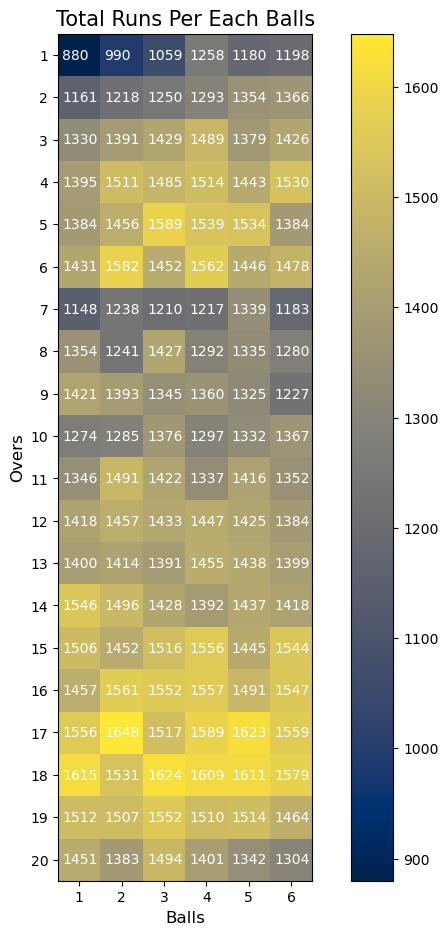

In [285]:
plt.figure(figsize=(10,11))
plt.imshow(runs_per_ball,cmap="cividis")

plt.title("Total Runs Per Each Balls",size=15)
plt.xlabel("Balls",size=12)
plt.ylabel("Overs",size=12)
plt.xticks(np.arange(0,6),runs_per_ball.columns)
plt.yticks(np.arange(0,20),runs_per_ball.index)

for k in runs_per_ball.index:
    for j in runs_per_ball.columns:
        plt.annotate(runs_per_ball.loc[k][j],(j-1.4,k-0.9),color="white") 

plt.colorbar()
plt.show()

# Extra Runs By Each Teams

In [303]:
extra_run = df.groupby("bowling_team")["extra_runs"].sum()
extra_run.sort_values(ascending=False,inplace=True)

bowling_team
Mumbai Indians                 1260
Royal Challengers Bangalore    1205
Kings XI Punjab                1139
Kolkata Knight Riders          1073
Delhi Daredevils               1069
Rajasthan Royals               1058
Chennai Super Kings            1002
Deccan Chargers                 659
Sunrisers Hyderabad             403
Pune Warriors                   335
Kochi Tuskers Kerala            110
Rising Pune Supergiants         108
Gujarat Lions                    98
Name: extra_runs, dtype: int64 



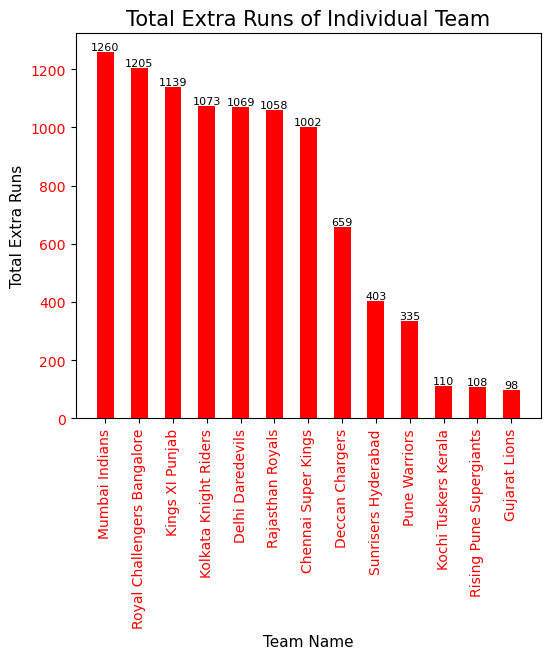

In [304]:
print(extra_run,"\n")
plt.figure(figsize=(6,5))
plt.bar_label(plt.bar(extra_run.index,extra_run.values,width=0.5,color="red"),color="Black",size=8)
plt.title("Total Extra Runs of Individual Team",color="Black",size=15)
plt.xlabel("Team Name",color="black",size=11)
plt.ylabel("Total Extra Runs",color="black",size=11)
plt.xticks(rotation=90,color="r")
plt.yticks(color="r")
plt.show()

# Top-5 Batsman Runs

In [210]:
batsman_score = df.groupby("batsman")["total_runs"].sum()

In [213]:
top_5 = batsman_score.sort_values(ascending=False).head(5)

batsman
SK Raina     4291
V Kohli      4274
RG Sharma    3985
G Gambhir    3857
CH Gayle     3697
Name: total_runs, dtype: int64


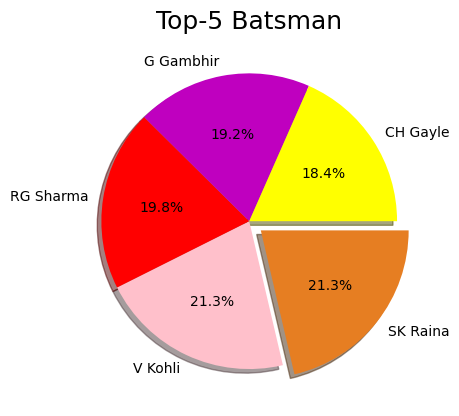

In [242]:
print(top_5)
plt.pie(top_5,labels=top_5.index,counterclock=False,autopct="%.1f%%",explode=[0.1,0,0,0,0],shadow=True,
        colors=["#E67E22","Pink","r","m","Yellow"])

plt.title("Top-5 Batsman",color="Black",size=18)
plt.show()

# Basman Total Runs Par Match
- ==> to get the batsman details, call the function named get_teamname("Enter Team Name")
- ==> After team name selection, enter the batsman name in diaglog box

In [70]:
def get_teamname(team_name):
    """
    to get the batsman details, call the function named get_teamname("Enter Team Name")
    i.e. get_teamname(team_name)
    
    After team name selection, enter the batsman name in diaglog box   
    """        
    
    import matplotlib.pyplot as plt
    name = team_name.upper()
    player_name=df.groupby("sort_name")["batsman"].unique()
    final= pd.DataFrame(player_name.loc[name],columns=["Player Name"])
    print(final.to_string())
    user_input = input("\nEnter a Player Name From Given List: ")
    sorted_list=df[df["batsman"]==user_input]
    new_list = sorted_list.groupby("match_id")["total_runs"].sum()
    plt.figure(figsize=(18,9))
    plt.scatter(new_list.index,new_list.values,c=new_list.values,s=new_list.values*3,cmap="plasma",label="Run Score")
    plt.title(f"{user_input} Runs Score", color="Green", size = 19)
    plt.xlabel("Match Number",size=14)
    plt.ylabel("Runs", size=14)
    plt.xticks(new_list.index,rotation=90)
    plt.yticks(new_list.values)
    plt.legend
    plt.plot()

# Batsman Hits

In [97]:
def batsman_hits(team_name):
    name = team_name.upper()
    runs = df[df["batsman_runs"].isin([4,6])]
    batsmans = runs[runs["sort_name"]==name]
    print(batsmans["batsman"].unique())
    user_input = input("\nEnter Batsman Name: ")    
    batsman = batsmans[batsmans["batsman"]==user_input]
    plt.figure(figsize=(6,6))
    sns.stripplot(x="batsman_runs",y="match_id",data=batsman,size=6,palette="rocket")
    plt.title(f"{user_input} Hits", color="m",loc="right")
    plt.grid()
    plt.show()